https://machinelearningmastery.com/handle-missing-data-python/

In [1]:
import numpy as np 
import pandas as pd
from numpy import NaN

In [2]:
dataset = pd.read_csv('E:\HITAM\Workshop ppt\ml_data\pima-indians-diabetes.csv',header=None)

0. Number of times pregnant.
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
2. Diastolic blood pressure (mm Hg).
3. Triceps skinfold thickness (mm).
4. 2-Hour serum insulin (mu U/ml).
5. Body mass index (weight in kg/(height in m)^2).
6. Diabetes pedigree function.
7. Age (years).
8. Class variable (0 or 1).

In [3]:

dataset.head(10)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
dataset.shape

(768, 9)

In [6]:
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, NaN)
# count the number of nan values in each column
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/?ref=rp

In [7]:
print(dataset[2])

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: 2, Length: 768, dtype: float64


<AxesSubplot:>

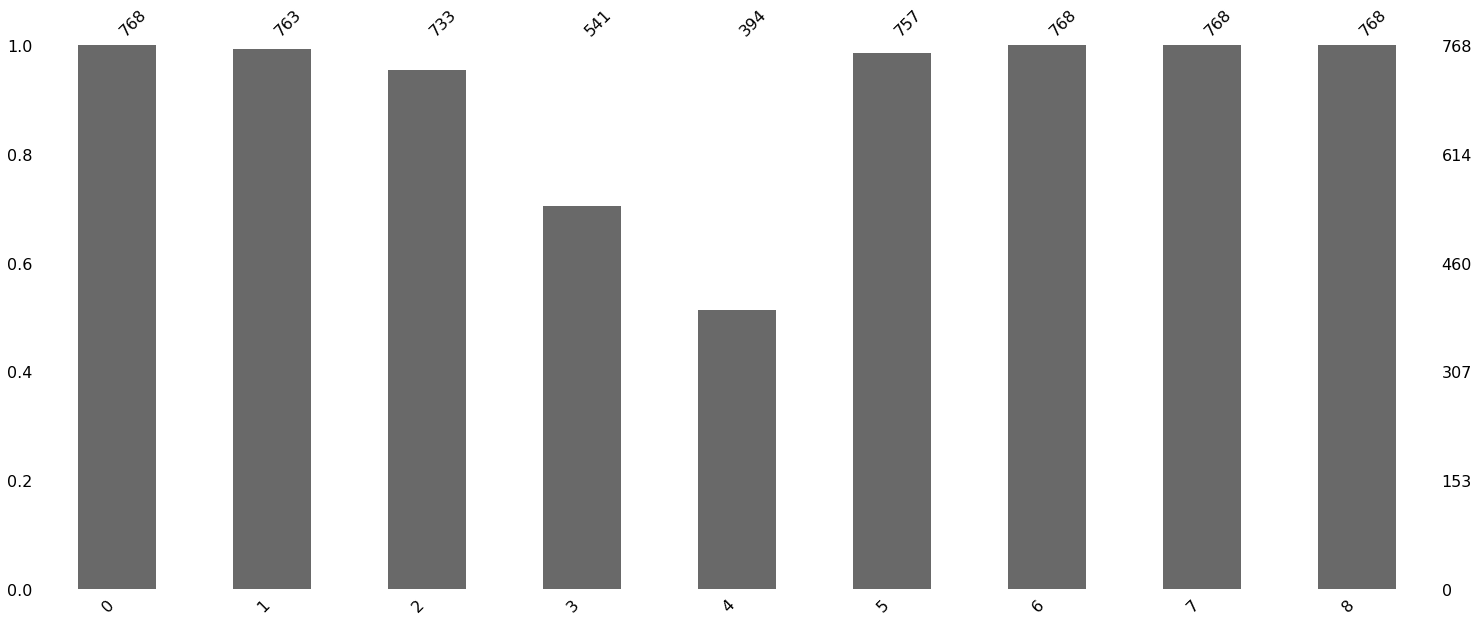

In [6]:
!pip install missingno
import missingno as msno
msno.bar(dataset)

In [7]:
print(dataset)

      0      1     2     3      4     5      6   7  8
0     6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1     1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2     8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3     1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4     0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
..   ..    ...   ...   ...    ...   ...    ...  .. ..
763  10  101.0  76.0  48.0  180.0  32.9  0.171  63  0
764   2  122.0  70.0  27.0    NaN  36.8  0.340  27  0
765   5  121.0  72.0  23.0  112.0  26.2  0.245  30  0
766   1  126.0  60.0   NaN    NaN  30.1  0.349  47  1
767   1   93.0  70.0  31.0    NaN  30.4  0.315  23  0

[768 rows x 9 columns]


In [8]:
# making new data frame with dropped NA values 
new_data = dataset.dropna(axis = 0, how ='any') 
print(new_data)

      0      1     2     3      4     5      6   7  8
3     1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4     0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
6     3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
8     2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
13    1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
..   ..    ...   ...   ...    ...   ...    ...  .. ..
753   0  181.0  88.0  44.0  510.0  43.3  0.222  26  1
755   1  128.0  88.0  39.0  110.0  36.5  1.057  37  1
760   2   88.0  58.0  26.0   16.0  28.4  0.766  22  0
763  10  101.0  76.0  48.0  180.0  32.9  0.171  63  0
765   5  121.0  72.0  23.0  112.0  26.2  0.245  30  0

[392 rows x 9 columns]


In [9]:
# making new data frame with dropped NA values 
new_data = dataset.dropna(axis = 0, how ='all') 
print(new_data)

      0      1     2     3      4     5      6   7  8
0     6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1     1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2     8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3     1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4     0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
..   ..    ...   ...   ...    ...   ...    ...  .. ..
763  10  101.0  76.0  48.0  180.0  32.9  0.171  63  0
764   2  122.0  70.0  27.0    NaN  36.8  0.340  27  0
765   5  121.0  72.0  23.0  112.0  26.2  0.245  30  0
766   1  126.0  60.0   NaN    NaN  30.1  0.349  47  1
767   1   93.0  70.0  31.0    NaN  30.4  0.315  23  0

[768 rows x 9 columns]


In [10]:
from numpy import NaN
from sklearn.impute import SimpleImputer
# retrieve the numpy array
values = dataset.values
# define the imputer
imputer = SimpleImputer(missing_values=NaN, strategy='mean')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
pd.DataFrame(transformed_values)

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.00000,155.548223,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.15342,155.548223,30.1,0.349,47.0,1.0


Iterative imputation refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

In [33]:
# filling a missing value with
# previous ones  
dataset.fillna(method ='ffill')

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,29.0,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,180.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,23.0,112.0,30.1,0.349,47,1


In [11]:
# filling  null value using fillna() function  
dataset.fillna(method ='backfill')

,0,1,2,3,4,5,6,7,8
0,6,148.0,72.0,35.0,94.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,94.0,26.6,0.351,31,0
2,8,183.0,64.0,23.0,94.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,112.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,31.0,NaN,30.1,0.349,47,1


In [12]:
# importing pandas as pd
import pandas as pd
   
#https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/?ref=lbp
# importing numpy as np
import numpy as np
   
# dictionary of lists
dict = {'First Score':[100, np.nan, np.nan, 95],
        'Second Score': [30, np.nan, 45, 56],
        'Third Score':[52, np.nan, 80, 98],
        'Fourth Score':[60, 67, 68, 65]}
  
# creating a dataframe from dictionary 
df = pd.DataFrame(dict)
     
df

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52.0,60
1,NaN,NaN,NaN,67
2,NaN,45.0,80.0,68
3,95.0,56.0,98.0,65


In [13]:
from fancyimpute import KNN
# calling the KNN class
knn_imputer = KNN()
# imputing the missing value with knn imputer
dataknn = knn_imputer.fit_transform(values)
pd.DataFrame(dataknn)

Imputing row 1/768 with 1 missing, elapsed time: 0.103
Imputing row 101/768 with 2 missing, elapsed time: 0.103
Imputing row 201/768 with 1 missing, elapsed time: 0.103
Imputing row 301/768 with 3 missing, elapsed time: 0.103
Imputing row 401/768 with 2 missing, elapsed time: 0.103
Imputing row 501/768 with 0 missing, elapsed time: 0.103
Imputing row 601/768 with 1 missing, elapsed time: 0.103
Imputing row 701/768 with 0 missing, elapsed time: 0.103


,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.000000,162.743255,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,62.914770,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,26.464588,180.726394,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.000000,169.595752,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,32.886413,130.228539,30.1,0.349,47.0,1.0


In [14]:
!pip install fancyimpute
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer()
# filling the missing value with mice imputer
micedata = mice_imputer.fit_transform(values)
print(micedata)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/?ref=lbp